# HW 8

___

In [4]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML, display
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

# Optional: add this code after `anim_fig = anim.FuncAnimation(...)`
#           to eliminate the extra final frame
# display(HTML(anim_fig.to_jshtml()))
# plt.close() 

### Build a Max Heap
Write a function **`build_max_heap(arr)`** that takes an array (or list) of numbers and re-arranges the elements to satisfy the max heap property. For example,
```
nums = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(nums)
nums
```
returns `[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]`.


In [5]:
def parent(i):
    if i==0:
        return None
    else:
        return math.floor((i-1)/2)

In [6]:
def left(i):
    return 2*i + 1

In [7]:
def right(i):
    return 2*i + 2

In [8]:
def max_heapify(arr, i):
    l = left(i)     #indicies of left and right children
    r = right(i)
    largest=0
    if l<len(arr) and arr[l]>arr[i]:
        largest = l
    else:
        largest = i
    if r<len(arr) and arr[r]>arr[largest]:
        largest = r
    
    if largest != i:
        temp = arr[i]
        arr[i] = arr[largest]
        arr[largest] = temp
        max_heapify(arr, largest)

In [9]:
arr1 = [16, 4,10, 14,7,9,3, 2,8,1]

In [10]:
max_heapify(arr1, 1)
arr1

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

In [11]:
def build_max_heap(arr):
    length = len(arr)
    start = math.floor((length-1)/2)
    for i in range(start, -1, -1):
        max_heapify(arr, i)

In [12]:
nums = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(nums)
nums

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

### Plot a Heap
Write a function **`plot_heap(arr)`** that displays the heap corresponding to an array or list of numbers. Below is a sample result for a list of 12 numbers. You may assume that the maximum list size is 31 and that the numbers are positive integers less than 100. It is not necessary to exactly match the appearance of the example below.

*Hint:* You may use the `heap_node_xy_coord()` helper function defined below, which returns  $(x, y)$ coordinates for any heap node by index (starting with $0$). The nodes will be assigned a $y$-coordinate of $1, 2, \ldots$, starting with the lowest level of the heap. The $x$-coordinates for the nodes will be symmetrical about $x=0$ with gaps starting $1$ unit apart at the lowest level.

<img src="http://www.coloradomath.org/python/plot-heap.jpg" width="518" height="346" />

In [13]:
def heap_node_xy_coord(index, arrsize):
    '''Return heap (x,y) coordinates for an index of an array or list.
       Indices begin with 0. The y-coordinates begin with 1 at the lowest
       level of the heap. The x-coordinates are symmetric about x=0 with 
       gaps starting 1 unit apart at the lowest level.'''
    
    heap_height = math.ceil(math.log2(arrsize + 1))
    node_level = math.floor(math.log2(index + 1))
    ycoord = heap_height - node_level

    xgap = 2 ** ycoord
    max_nodes_level = 2 ** node_level
    nodes_above = max_nodes_level - 1
    xstart = - xgap * (max_nodes_level-1) / 2
    xcoord = xstart + xgap * (index - nodes_above)

    return xcoord, ycoord

In [14]:
def plot_heap(arr):
    length = len(arr)

    fig, ax = plt.subplots()
    ax.set_axis_off()
    for idx, val in enumerate(arr):
        x,y = heap_node_xy_coord(idx, length)
        ax.plot(x,y,'o', ms=15, )
        ax.text(x,y, val, horizontalalignment='center',verticalalignment='center')
        
        if idx != 0:
            parent_i = parent(idx)
            xp, yp = heap_node_xy_coord(parent_i, length)
            ax.plot([x,xp],[y,yp], color = 'skyblue', alpha=.5)

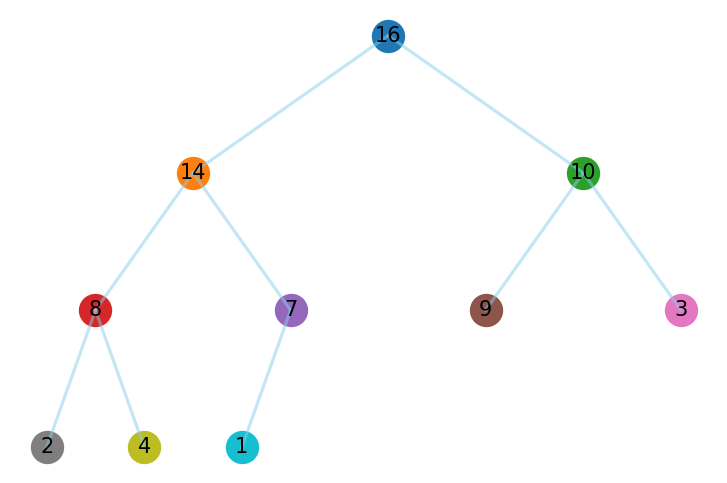

In [15]:
plot_heap([16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

### Animate Building a Max Heap
**Animate** the `build_max_heap()` process by highlighting each internal node in its original position, then its relocated position(s). You may assume that 31 is the maximum list size and that the numbers are positive integers less than 100. A sample result is shown here (http://www.coloradomath.org/python/build_max_heap.gif) which simulates the example shown below from page 158 in the textbook.

<img src="http://www.coloradomath.org/python/build-max-heap.jpg" width="544" height="626" />


In [16]:
def build_max_heap_anim(arr):
    
    frame_lst = []  # list of intermediate arrays and the index of the node that is being heapified
    
    # define a new max_heapify func
    def max_heapify_anim(arr, i):
        copy = arr.copy()
        frame_lst.append((copy, i))
        l = left(i)  
        r = right(i)
        largest=0
        if l<len(arr) and arr[l]>arr[i]:
            largest = l
        else:
            largest = i
        if r<len(arr) and arr[r]>arr[largest]:
            largest = r

        if largest != i:
            temp = arr[i]
            arr[i] = arr[largest]
            arr[largest] = temp
            max_heapify_anim(arr, largest)
    
    # build the max array using new max_heapify func
    length = len(arr)
    start = math.floor((length-1)/2)
    for i in range(start, -1, -1):
        max_heapify_anim(arr, i)
    
    fig, ax = plt.subplots()
    ax.set_axis_off()
    # define a plotting function
    def plot_heap_anim(fval):
        arr2, largest1 = frame_lst[fval][0], frame_lst[fval][1]
        ax.clear()
        length = len(arr2)

        for idx, val in enumerate(arr2):
            x,y = heap_node_xy_coord(idx, length)

            if idx==largest1:
                ax.text(x,y, val, horizontalalignment='center',verticalalignment='center')
                ax.plot(x,y,'o', color='cyan', ms=15)
            else:
                ax.text(x,y, val, horizontalalignment='center',verticalalignment='center')
                ax.plot(x,y,'o', color='grey', ms=15)

            if idx != 0:
                parent_i = parent(idx)
                xp, yp = heap_node_xy_coord(parent_i, length)
                ax.plot([x,xp],[y,yp], color='grey', alpha=.5)
        
        
    return anim.FuncAnimation(fig, plot_heap_anim, 
                   frames=len(frame_lst),
                   interval=800)

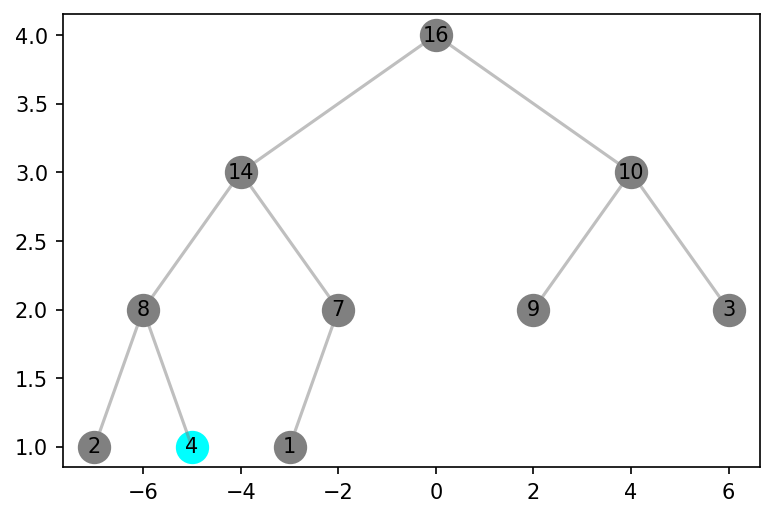

In [17]:
build_max_heap_anim([4, 1, 3, 2, 16, 9, 10, 14, 8, 7])

# Radix Sort